In [3]:
import pandas as pd
import numpy as np
import time
import datetime
import dateutil.parser 
import json
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [5]:
pd.read_csv("f20.txt")

,NAME TYPE TARGET HTTP_STATUS STATUS TIMESTAMP
0,operation-1550515303308-5822f79df5b38-47ee07e5...
1,operation-1550584279470-5823f892c1047-dc898c58...
2,operation-1550584319014-5823f8b8775db-02b11454...
3,operation-1550584319015-5823f8b877880-0f4fa9f9...
4,operation-1550591088537-582411f063050-a56dab24...
5,operation-1550614643706-582469b058979-6c6cb754...
6,operation-1550614648723-582469b5219bc-9d63e987...
7,operation-1550614719322-582469f8758c9-489cadb4...
8,operation-1550614804007-58246a4938b20-29dd31a1...
9,operation-1550518941803-5823052be65dc-007c9ad5...


In [6]:
fc=open("f21.json")

In [7]:
jdata = json.load(fc)

In [8]:
def ttl_in_minutes(start_time, end_time):
    s=dateutil.parser.parse(start_time)
    e=dateutil.parser.parse(end_time)
    diff = e-s
    return diff.total_seconds()

In [9]:
out = dict()
for entry in jdata:
    eid = entry['id']
    iname = entry['targetLink']
    if entry['operationType']=='insert':
        out[iname] = (entry, np.nan)
    if entry['operationType']=='compute.instances.preempted':
        orig_entry = out[iname][0]
        start_time = orig_entry['insertTime']
        end_time = entry['insertTime']
        ttl = ttl_in_minutes(start_time, end_time)
        out[iname] = (orig_entry, ttl)

In [10]:
string_time='2019-02-19T11:43:16.099-08:00'

In [11]:
for e in list(out):
    #print(out[e][1])
    if np.isnan(out[e][1]):
        print("deleting")
        out.pop(e) 

deleting
deleting
deleting
deleting
deleting
deleting
deleting
deleting
deleting
deleting
deleting
deleting
deleting
deleting
deleting
deleting
deleting
deleting
deleting
deleting
deleting
deleting
deleting
deleting
deleting
deleting
deleting
deleting
deleting


In [12]:
out

{u'https://www.googleapis.com/compute/v1/projects/first-220321/zones/europe-north1-a/instances/aardvark27': ({u'endTime': u'2019-02-18T11:42:52.506-08:00',
   u'id': u'9133208911590372464',
   u'insertTime': u'2019-02-18T11:42:23.437-08:00',
   u'kind': u'compute#operation',
   u'name': u'operation-1550518941803-5823052be65dc-007c9ad5-db373ff0',
   u'operationType': u'insert',
   u'progress': 100,
   u'selfLink': u'https://www.googleapis.com/compute/v1/projects/first-220321/zones/europe-north1-a/operations/operation-1550518941803-5823052be65dc-007c9ad5-db373ff0',
   u'startTime': u'2019-02-18T11:42:26.186-08:00',
   u'status': u'DONE',
   u'targetId': u'7290062617505608817',
   u'targetLink': u'https://www.googleapis.com/compute/v1/projects/first-220321/zones/europe-north1-a/instances/aardvark27',
   u'user': u'prateeks@first-220321.iam.gserviceaccount.com',
   u'zone': u'https://www.googleapis.com/compute/v1/projects/first-220321/zones/europe-north1-a'},
  86460.7),
 u'https://www.goo

In [13]:
s=list(zip(*(out.values())))[1]

In [17]:
np.nancumsum(s)

AttributeError: 'module' object has no attribute 'nancumsum'

In [15]:
len(s)

31

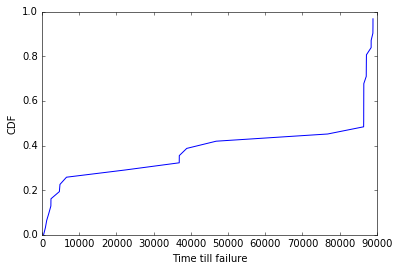

In [17]:
plt.plot(np.sort(s), np.linspace(0,1,len(s), endpoint=False))
plt.xlabel("Time till failure")
plt.ylabel("CDF")

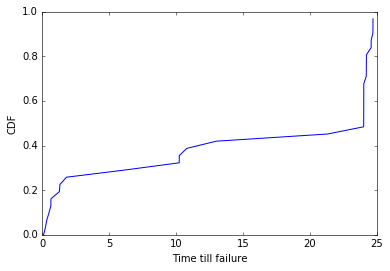

In [18]:
h=np.array(s)/3600.0
plt.plot(np.sort(h), np.linspace(0,1,len(h), endpoint=False))
plt.xlabel("Time till failure")
plt.ylabel("CDF")

In [37]:
dt=dateutil.parser.parse(string_time)

In [38]:
datetime.timedelta(dt, dt)

TypeError: unsupported type for timedelta seconds component: datetime.datetime

In [40]:
d=dt-dt

In [41]:
d.total_second

0.0

In [19]:
import scipy.stats

In [20]:
help(scipy.stats.weibull_min)

Help on weibull_min_gen in module scipy.stats._continuous_distns object:

class weibull_min_gen(scipy.stats._distn_infrastructure.rv_continuous)
 |  Weibull minimum continuous random variable.
 |  
 |  %(before_notes)s
 |  
 |  See Also
 |  --------
 |  weibull_max
 |  
 |  Notes
 |  -----
 |  The probability density function for `weibull_min` is:
 |  
 |  .. math::
 |  
 |      f(x, c) = c x^{c-1} \exp(-x^c)
 |  
 |  for :math:`x > 0`, :math:`c > 0`.
 |  
 |  `weibull_min` takes ``c`` as a shape parameter.
 |  
 |  %(after_notes)s
 |  
 |  %(example)s
 |  
 |  Method resolution order:
 |      weibull_min_gen
 |      scipy.stats._distn_infrastructure.rv_continuous
 |      scipy.stats._distn_infrastructure.rv_generic
 |      __builtin__.object
 |  
 |  Methods inherited from scipy.stats._distn_infrastructure.rv_continuous:
 |  
 |  __init__(self, momtype=1, a=None, b=None, xtol=1e-14, badvalue=None, name=None, longname=None, shapes=None, extradoc=None, seed=None)
 |  
 |  cdf(self, x, *